# Chapter 3: Exercise 15

**Import packages**

In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS, summarize)

## Predicting per capita crime rate from the Boston data set

### (a)  Fit a simple linear regression model for each predictor

In [2]:
os.chdir('C:/Users/carma/Documents/GitHub/an-introduction-to-statistical-learning-with-applications-in-python/Datasets')

In [3]:
df = pd.read_csv('Boston.csv')
y = df['crim']

In [4]:
y.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

**Fit model with zn**

In [5]:
df['zn'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

In [6]:
X = MS(['zn']).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,4.4537,0.417,10.675,0.0
zn,-0.0739,0.016,-4.594,0.0


Text(0, 0.5, 'crim')

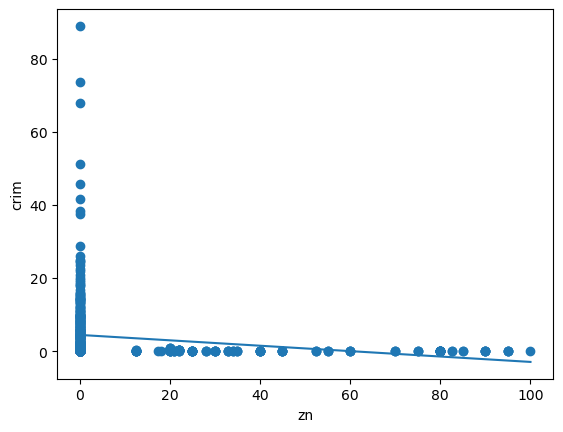

In [7]:
plt.scatter(df['zn'], y)
plt.plot([0,100],[4.4537, 4.4537 - 0.0739*100])
plt.xlabel('zn')
plt.ylabel('crim')

In [8]:
len(df[df['zn'] == 0])

372

In [9]:
df[['crim', 'zn']][df['crim'] > 1]

,crim,zn
16,1.05393,0.0
20,1.25179,0.0
22,1.23247,0.0
29,1.00245,0.0
30,1.13081,0.0
...,...,...
483,2.81838,0.0
484,2.37857,0.0
485,3.67367,0.0
486,5.69175,0.0


In [10]:
len(df[['crim', 'zn']][df['zn'] == 0])/len(df[['crim', 'zn']])

0.7351778656126482

There is a statistically significant association between 'zn' and 'crim', however from the looks of the scatter plot and estimated regression line, it does not seem to do us much good. There are far too many observations in our data with a zn value of zero, in which we see there is a broad range of crim values. In fact 73% of our data has zn value zero.

**Fit model with indus**

In [11]:
df['indus'].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: indus, dtype: float64

In [12]:
X = MS(['indus']).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,-2.0637,0.667,-3.093,0.002
indus,0.5098,0.051,9.991,0.000


Text(0, 0.5, 'crim')

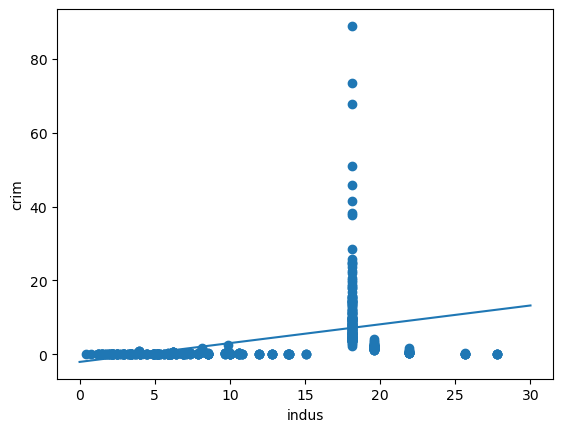

In [13]:
plt.scatter(df['indus'], y)
plt.plot([0,30],[-2.0637, -2.0637 + 0.5098*30])
plt.xlabel('indus')
plt.ylabel('crim')

In [14]:
df[['crim', 'indus']][df['crim'] > 5].sort_values('crim', ascending=False)

,crim,indus
380,88.97620,18.1
418,73.53410,18.1
405,67.92080,18.1
410,51.13580,18.1
414,45.74610,18.1
...,...,...
433,5.58107,18.1
451,5.44114,18.1
391,5.29305,18.1
358,5.20177,18.1


In [15]:
df[['crim']][df['indus'] == 18.1]

,crim
356,8.98296
357,3.84970
358,5.20177
359,4.26131
360,4.54192
...,...
483,2.81838
484,2.37857
485,3.67367
486,5.69175


In [16]:
df[['crim']][df['indus'] == 18.1].describe()

,crim
count,132.000000
mean,12.759291
std,13.041169
min,2.378570
25%,5.686307
50%,9.084990
75%,14.333700
max,88.976200


In [17]:
y.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [18]:
len(df[['crim']][df['indus'] == 18.1])/len(df[['crim']])

0.2608695652173913

There is a statistically significant association between 'indus' and 'crim', however from the looks of the scatter plot and estimated regression line, it does not seem to do us much good. We make note that in our data set, all neighborhoods which have high crime rate happen to have indus value equal to 18.1, and 26% of the data has this value.

**Fit model with chas**

In [19]:
np.sum(df['chas'] == 1)

35

35 out of the 506 observations bound the Charles River

In [20]:
X = MS(['chas']).fit_transform(df)
result = sm.OLS(y, X).fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,3.7444,0.396,9.453,0.000
chas,-1.8928,1.506,-1.257,0.209


Text(0, 0.5, 'crim')

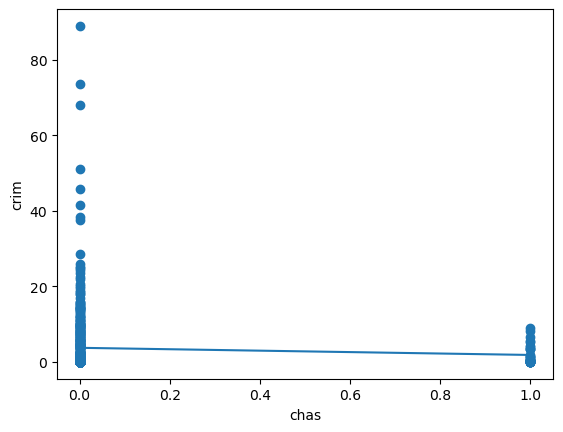

In [21]:
plt.scatter(df['chas'], y)
plt.plot([0,1],[3.7444, 3.7444 - 1.8928*1])
plt.xlabel('chas')
plt.ylabel('crim')

There is not a statistically significant association between 'chas' and 'crim'. However if we had to guess which neighborhoods may have higher crime rate, we would say ones that do not bound the Charles River. This is clear from the scatter plot.